In [1]:
# https://www.iartificial.net/regresion-lineal-con-ejemplos-en-python/

%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

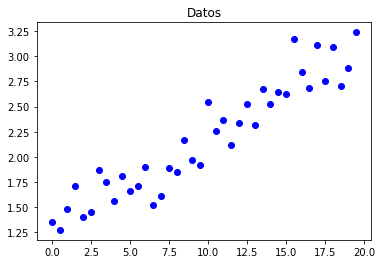

In [2]:
def f(x):  # función f(x) = 0.1*x + 1.25 + 0.2*Ruido_Gaussiano
    np.random.seed(42) # para poder reproducirlo
    y = 0.1*x + 1.25 + 0.2*np.random.randn(x.shape[0])
    return y

x = np.arange(0, 20, 0.5) # generamos valores x de 0 a 20 en intervalos de 0.5
y = f(x) # calculamos y a partir de la función que hemos generado

# hacemos un gráfico de los datos que hemos generado
plt.scatter(x,y,label='data', color='blue')
plt.title('Datos');

# Datos de ejemplo para hacer una regresión lineal: y = 0.1*x + 1.25 + N(0, 0.2)

In [3]:
from sklearn.linear_model import LinearRegression

regresion_lineal = LinearRegression() # creamos una instancia de LinearRegression
regresion_lineal.fit(x.reshape(-1,1), y) # instruimos a la regresión lineal que aprenda de los datos (x,y)

# vemos los parámetros que ha estimado la regresión lineal
print('w = ' + str(regresion_lineal.coef_) + ', b = ' + str(regresion_lineal.intercept_))

w = [0.09183522], b = 1.2858792525736682


In [4]:
# vamos a predicir y = regresion_lineal(5)
nuevo_x = np.array([5]) 
prediccion = regresion_lineal.predict(nuevo_x.reshape(-1,1))
print(prediccion)

[1.74505534]


In [5]:
# importamos el cálculo del error cuadrático medio (MSE)
from sklearn.metrics import mean_squared_error

# Predecimos los valores y para los datos usados en el entrenamiento
prediccion_entrenamiento = regresion_lineal.predict(x.reshape(-1,1))

# Calculamos el Error Cuadrático Medio (MSE = Mean Squared Error)
mse = mean_squared_error(y_true = y, y_pred = prediccion_entrenamiento)

# La raíz cuadrada del MSE es el RMSE
rmse = np.sqrt(mse)
print('Error Cuadrático Medio (MSE) = ' + str(mse))
print('Raíz del Error Cuadrático Medio (RMSE) = ' + str(rmse))

Error Cuadrático Medio (MSE) = 0.03318522012927899
Raíz del Error Cuadrático Medio (RMSE) = 0.18216810952875093


In [6]:
# calculamos el coeficiente de determinación R2
r2 = regresion_lineal.score(x.reshape(-1,1), y)
print('Coeficiente de Determinación R2 = ' + str(r2))

Coeficiente de Determinación R2 = 0.8943593637683117


Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Coefficient of determination: 0.47


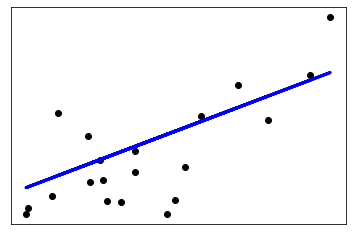

In [7]:
# https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test, color="black")
plt.plot(diabetes_X_test, diabetes_y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [8]:
# https://machinelearningparatodos.com/regresion-lineal-en-python/
import numpy as np
import random
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
%matplotlib inline

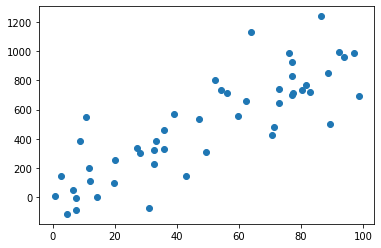

In [9]:
# Generador de distribución de datos para regresión lineal simple

def generador_datos_simple(beta, muestras, desviacion):
  # Genero n (muestras) valores de x aleatorios entre 0 y 100
  x = np.random.random(muestras) * 100
  
  # Genero un error aleatorio gaussiano con desviación típica (desviacion)
  e = np.random.randn(muestras) * desviacion
  
  # Obtengo el y real como x*beta + error
  y = x * beta + e
  
  return x.reshape((muestras,1)), y.reshape((muestras,1))

# Parámetros de la distribución
desviacion = 200
beta = 10
n = 50
x, y = generador_datos_simple(beta, n, desviacion)

# Represento los datos generados
plt.scatter(x, y)
plt.show()

In [10]:
# Creo un modelo de regresión lineal
modelo = linear_model.LinearRegression()
 
# Entreno el modelo con los datos (X,Y)
modelo.fit(x, y)
# Ahora puedo obtener el coeficiente b_1
print('Coeficiente beta1: ', modelo.coef_[0])
 
# Podemos predecir usando el modelo
y_pred = modelo.predict(x)

Coeficiente beta1:  [9.508124]


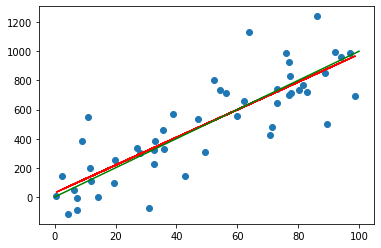

In [11]:
# Representamos el ajuste (rojo) y la recta Y = beta*x (verde)
plt.scatter(x, y)
plt.plot(x, y_pred, color='red')

x_real = np.array([0, 100])
y_real = x_real*beta

plt.plot(x_real, y_real, color='green')
plt.show()